<h1>FIFA 23 ML Project <img src="https://img.icons8.com/color/48/null/football-team.png"/></h1>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [342]:
data = pd.read_csv("./players_fifa23.csv")
data.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [4]:
data.shape

(18539, 90)

In [343]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating',
       'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'LWBRating',
       'CDMRating', 'RWBRating', 'LBRating', 'CBRating', 'RBRating',
       'GKRating']

data = data[needed_columns]

<h2>EDA <img src="https://img.icons8.com/color/48/null/strategy-board.png" width="38"/></h2>

<h3>1. Does the Age of the Player Affect on his Ball Control Performance?</h3>

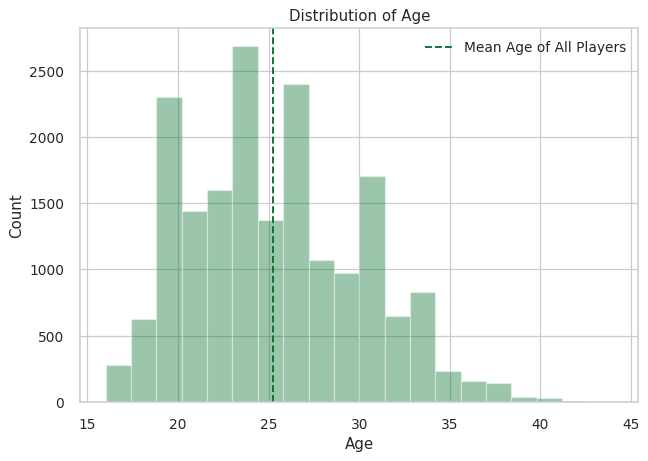

In [301]:
sns.set_palette("Greens_r")
plt.figure(dpi=90)
sns.distplot(x=data['Age'], kde=False, bins=20)
plt.axvline(x=np.mean(data['Age']), ls='--', label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

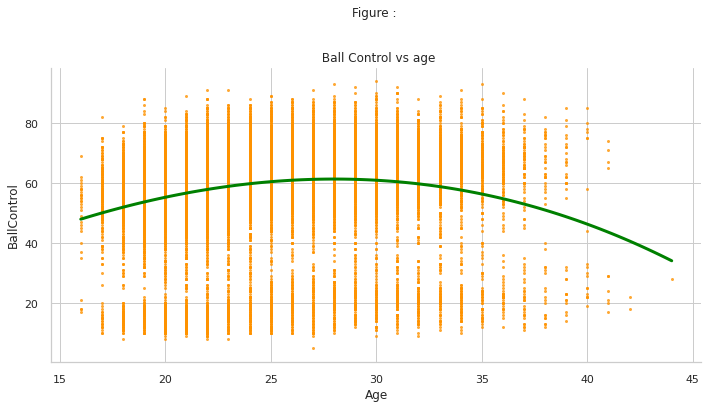

In [312]:
sns.set_palette("Wistia_r")
sns.lmplot(x="Age", y="BallControl",data=data,markers=".",
           order=3, ci=None, line_kws={"linewidth":3,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Ball Control vs age");
plt.show()

<h4>- So We can deduce that the age has an effect on the Player's Ball Control.</br></br>
    - While the Age is increasing, the Ball Control decreases.
</h4>

<p style="font-size:20px">So I can advice my Club to buy Players with age < 30 So the Player has a great Ball Control skill.</p>

<h3>2. Show how Height affects different factors like stamina, dribbling, pace, passing and HeadingAccuracy:</h3> 

<AxesSubplot:xlabel='Height', ylabel='Value'>

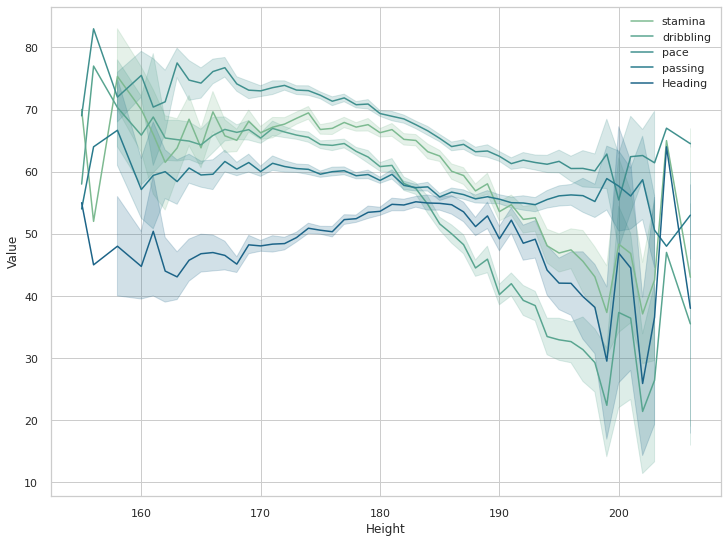

In [322]:
sns.set_palette("crest")
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.ylabel("Value")

sns.lineplot(x='Height', y='Stamina', data=data, legend='brief', label='stamina')
sns.lineplot(x='Height', y='Dribbling', data=data, legend='brief', label='dribbling')
sns.lineplot(x='Height', y='PaceTotal', data=data, legend='brief', label='pace')
sns.lineplot(x='Height', y='PassingTotal', data=data, legend='brief', label='passing')
sns.lineplot(x='Height', y='HeadingAccuracy', data=data, legend='brief', label='Heading')

<h4>- As height increases, features like stamina, dribbling, pace, passing decreases.</br> </br>
    - As height increases, features like Heading increase.</h4>

<h3>3. Show if there is a realtion between Wage and Overall of the Players:</h3>

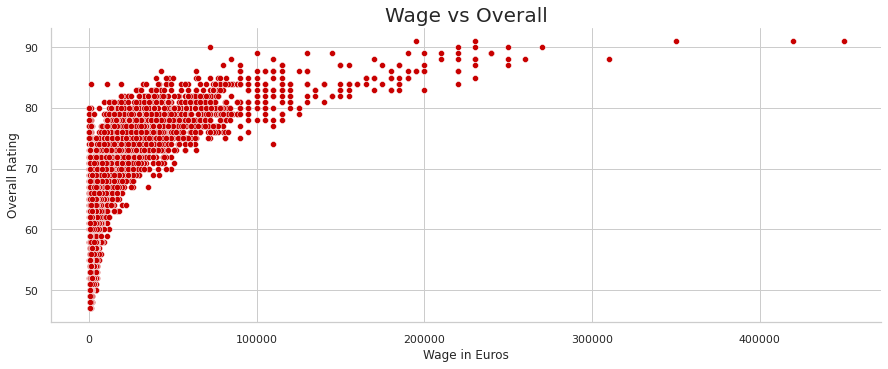

In [337]:
sns.set_palette("seismic_r")
sns.relplot(x='WageEUR',y='Overall',palette = 'viridis', aspect=2.5,data=data)
plt.title('Wage vs Overall',fontsize = 20)
plt.xlabel('Wage in Euros')
plt.ylabel('Overall Rating')
plt.show()

<h4>- As the Overall Rating Increase, the Wage of the Player Increases too.</h4>

<h3>4. Show the top Quikest Players:</h3>

In [338]:
top_acc = data.sort_values(by=["Acceleration"], ascending=False)

<AxesSubplot:xlabel='Name', ylabel='Acceleration'>

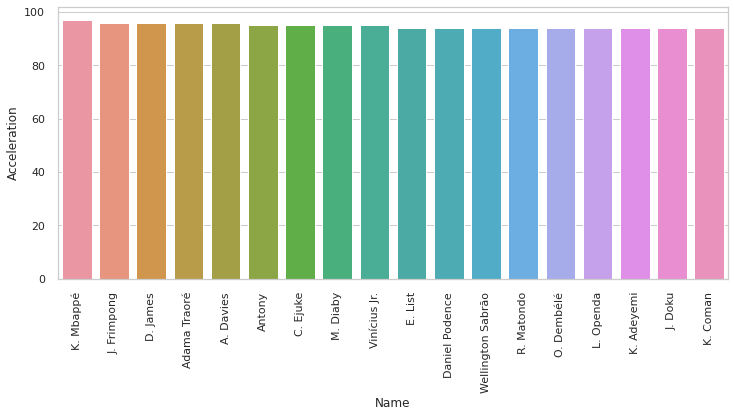

In [339]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Acceleration", data=top_acc.head(20))

<h3>5. Determine if their is a relation between the Position of the Player and his Wage and Value:</h3>

<AxesSubplot:xlabel='BestPosition', ylabel='WageEUR'>

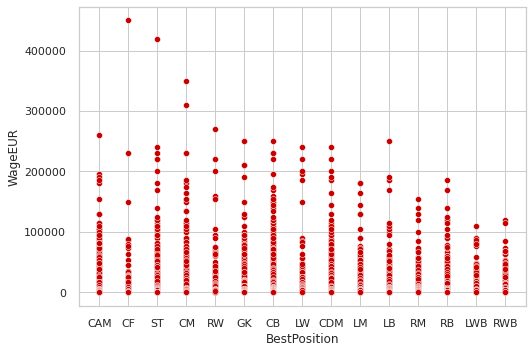

In [359]:
sns.scatterplot(x="BestPosition", y="WageEUR", data=data)

<AxesSubplot:xlabel='BestPosition', ylabel='ValueEUR'>

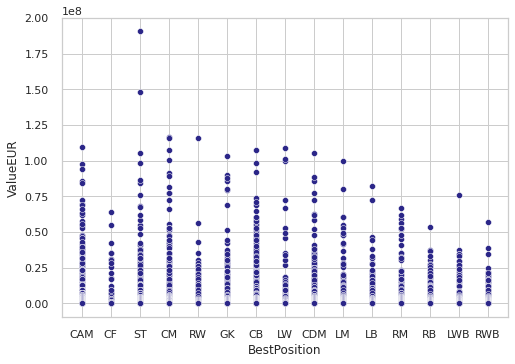

In [367]:
sns.set_palette("CMRmap")
sns.scatterplot(x="BestPosition", y="ValueEUR", data=data)

<h4>- So we can see that the Players in Positions LM, RM, RB, LWB, RWB got the lowest Wages.</br></br>
    - And the Players With Positions LB, RB, LWB, RWB have the lowest Values.</h4>

<h3>6. See the Nationality of the Players that got the heighest Wages:</h3>

In [348]:
top_wages = data.sort_values(by=["WageEUR"], ascending=False)

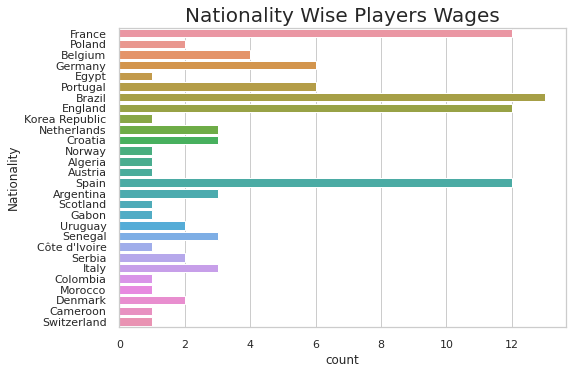

In [357]:
sns.countplot(y="Nationality",data=top_wages.head(100))
plt.title("Nationality Wise Players Wages",
          fontsize=20);

<h4>So we can deduce that the Players that got the Maximum Wage are from Brazil, France, England and Spain.</h4>

<h3>7. Show the effect of the Age on the Potential of the Players:</h3>

<AxesSubplot:xlabel='Age', ylabel='Potential'>

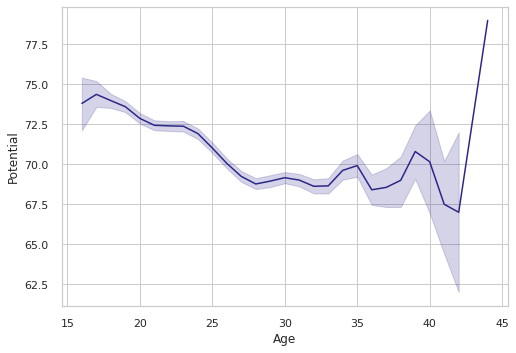

In [370]:
sns.lineplot(x="Age", y="Potential", data=data)

<h4>While the Age Increases the Potential of the Player Decreases.</h4>

<h3>8. View the Top 50 Players and their Clubs:</h3>

In [ ]:
top_rated = data.sort_values(by=["Overall"], ascending=False)
top50 = top_rated.head(50)

<h3>Plot The Top 50 Players</h3>

<AxesSubplot:xlabel='Name', ylabel='Overall'>

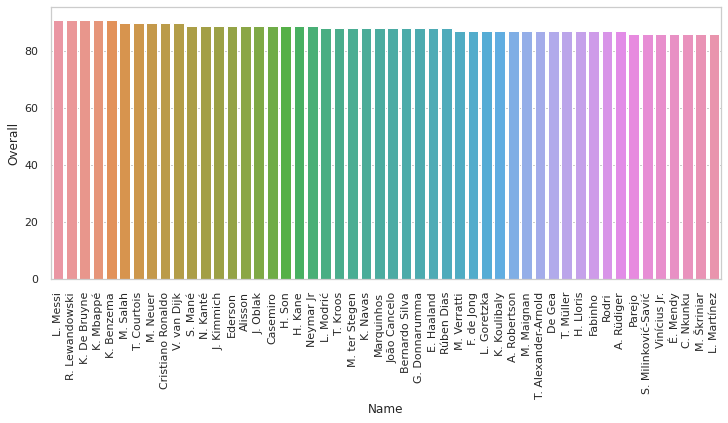

In [284]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Overall", data=top50)

<AxesSubplot:xlabel='Club', ylabel='count'>

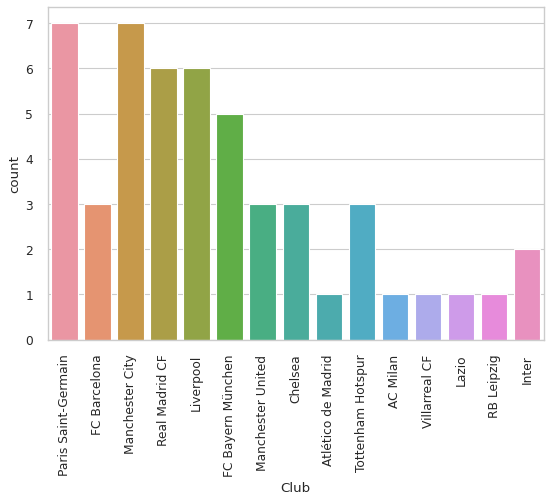

In [276]:
plt.figure(dpi=80)
plt.xticks(rotation=90)
sns.countplot(x="Club", data=top50)

<h4>- Paris Saint-Germainand Machester City have the maximum top Players numbers.</br></br>
    - Liverpool and Real Madrid have the second Maximum top Players numbers.</h4>
